# Drawing a density plot

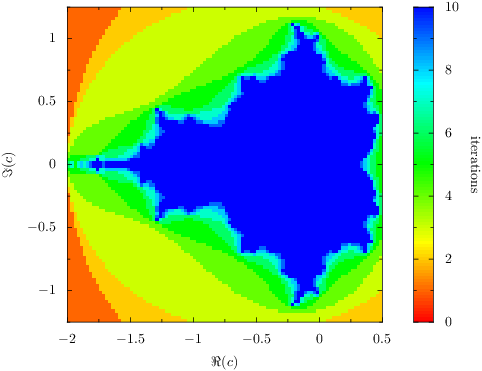

In [1]:
from pyx import *

# Mandelbrot calculation contributed by Stephen Phillips

# Mandelbrot parameters
re_min = -2
re_max = 0.5
im_min = -1.25
im_max = 1.25
gridx = 100
gridy = 100
max_iter = 10

# Set-up
re_step = (re_max - re_min) / gridx
im_step = (im_max - im_min) / gridy
d = []

# Compute fractal
for re_index in range(gridx):
    re = re_min + re_step * (re_index + 0.5)
    for im_index in range(gridy):
        im = im_min + im_step * (im_index + 0.5)
        c = complex(re, im)
        n = 0
        z = complex(0, 0)
        while n < max_iter and abs(z) < 2:
            z = (z * z) + c
            n += 1
        d.append([re, im, n])

# Plot graph
g = graph.graphxy(height=8, width=8,
                  x=graph.axis.linear(min=re_min, max=re_max, title=r"$\Re(c)$"),
                  y=graph.axis.linear(min=im_min, max=im_max, title=r'$\Im(c)$'))
g.plot(graph.data.points(d, x=1, y=2, color=3, title="iterations"),
       [graph.style.density(gradient=color.rgbgradient.Rainbow)])
g

2 dimensional plots where the value of each point is represented by a color can
be created by the density style.  The data points have to be spaced
equidistantly in each dimension with the possible exception of missing data.

For data which is not equidistantly spaced but still arranged in a grid,
`graph.style.surface` can be used, which also provides a smooth representation
by means of a color interpolation between the mesh moints. Finally, for
completely unstructured data, `graph.style.rect` can be used.

<img src="http://pyx.sourceforge.net/bend.png" align="left">The plot is encoded in an efficient way using a bitmap. Unfortunately, this
means, that the HSB color space cannot be used (due to limitations of the
bitmap color spaces in PostScript and PDF). Some of the predefined gradients in
PyX, e.g. `color.gradient.Rainbow`, cannot be used here. As a workaround, PyX
provides those gradients in other color spaces as shown in the example.
